# Instalação do PySpark no Google Colab

Para analisar grandes volumes de dados, comumente chamados de Big Data, com velocidade e eficiência, o Apache Spark é uma ferramenta muito utilizada, devido a sua grande capacidade de processamento e computação paralela dos dados.
O Spark foi concebido para ser acessível a partir de diversas APIs em Scala, Python, R, SQL entre outras linguagens.


## PySpark no Google Colab

PySpark é uma interface computacional de alto nível que nos permite acessar e usar o Spark por meio da linguagem Python. Através do PySpark, conseguimos escrever códigos utilizando o Python.

## PySpark no Google Colab

Para usar o PySpark no Google Colab é necessário instalar dependências como o Java-8, Apache spark-2.4.4 e o Hadoop-2.7.

Além disso, é preciso configurar as informações de ambiente, pois isso habilita o ambiente do Colab a identificar corretamente onde as dependências estão rodando.

Para conseguir “manipular” o terminal e interagir como ele, você pode usar a biblioteca os.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [3]:

!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


# Criar conexão

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# Pacotes de interesse

In [5]:
from pyspark.sql import functions as f
import pandas as pd

# Importar base

In [7]:
dados = spark.read.option("delimiter", ";").option("header", "true").csv("/content/bank-full.csv")

In [8]:
dados.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [10]:
# dados1 = spark.read.parquet("/content/bank-full")
# dados2 = spark.read.orc("/content/bank-full")

In [11]:
(
dados.write
       .partitionBy("education")
       .format("parquet")
       .mode("overwrite")
       .save("/content/bank_full_parquet")
     )

In [12]:
dados = spark.read.parquet("/content/bank_full_parquet")

In [13]:
dados.head(5)

[Row(age='44', job='technician', marital='single', default='no', balance='29', housing='yes', loan='no', contact='unknown', day='5', month='may', duration='151', campaign='1', pdays='-1', previous='0', poutcome='unknown', y='no', education='secondary'),
 Row(age='33', job='entrepreneur', marital='married', default='no', balance='2', housing='yes', loan='yes', contact='unknown', day='5', month='may', duration='76', campaign='1', pdays='-1', previous='0', poutcome='unknown', y='no', education='secondary'),
 Row(age='43', job='technician', marital='single', default='no', balance='593', housing='yes', loan='no', contact='unknown', day='5', month='may', duration='55', campaign='1', pdays='-1', previous='0', poutcome='unknown', y='no', education='secondary'),
 Row(age='41', job='admin.', marital='divorced', default='no', balance='270', housing='yes', loan='no', contact='unknown', day='5', month='may', duration='222', campaign='1', pdays='-1', previous='0', poutcome='unknown', y='no', educati

In [ ]:
dados.show()

+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|         job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 44|  technician|  single|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|secondary|
| 33|entrepreneur| married|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|secondary|
| 43|  technician|  single|     no|    593|    yes|  no|unknown|  5|  may|      55|       1|   -1|       0| unknown| no|secondary|
| 41|      admin.|divorced|     no|    270|    yes|  no|unknown|  5|  may|     222|       1|   -1|       0| unknown| no|secondary|
| 29|      admin.|  single|     no|    390|    yes|  no|unknown|  5|  may|     137|

## Verificando as partições

In [14]:
dados_primary = spark.read.parquet("/content/bank_full_parquet/education=primary")

In [15]:
dados_primary.show()

+---+-------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|      retired| married|     no|    121|    yes|  no|unknown|  5|  may|      50|       1|   -1|       0| unknown| no|
| 51|      retired| married|     no|    229|    yes|  no|unknown|  5|  may|     353|       1|   -1|       0| unknown| no|
| 57|  blue-collar| married|     no|     52|    yes|  no|unknown|  5|  may|      38|       1|   -1|       0| unknown| no|
| 60|      retired| married|     no|     60|    yes|  no|unknown|  5|  may|     219|       1|   -1|       0| unknown| no|
| 32|  blue-collar|  single|     no|     23|    yes| yes|unknown|  5|  may|     160|       1|   -1|       0| unknown| no|
| 40|      retired| marr

# Explorar Tabela

In [16]:
dados.printSchema()

root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- campaign: string (nullable = true)
 |-- pdays: string (nullable = true)
 |-- previous: string (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)
 |-- education: string (nullable = true)



In [17]:
dados.describe().show()

+-------+-----------------+-------+--------+-------+------------------+-------+-----+--------+------------------+-----+-----------------+-----------------+--------------------+--------+--------+-----+---------+
|summary|              age|    job| marital|default|           balance|housing| loan| contact|               day|month|         duration|         campaign|               pdays|previous|poutcome|    y|education|
+-------+-----------------+-------+--------+-------+------------------+-------+-----+--------+------------------+-----+-----------------+-----------------+--------------------+--------+--------+-----+---------+
|  count|            20632|  20632|   20632|  20632|             20632|  20632|20632|   20632|             20632|20632|            20632|            20632|               20632|   20632|   20632|20632|    20632|
|   mean|40.98424777045366|   null|    null|   null|1121.2743796044979|   null| null|    null|15.995104691740984| null|258.6710934470725|3.087000775494378| 

In [18]:
type(dados)

pyspark.sql.dataframe.DataFrame

In [19]:
dados.columns

['age',
 'job',
 'marital',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'education']

# Filtros e seleções

In [20]:
# Seleção de colunas
dados_select = dados.select("age","loan","job","education")
dados_select.show(10)

+---+----+------------+---------+
|age|loan|         job|education|
+---+----+------------+---------+
| 44|  no|  technician|secondary|
| 33| yes|entrepreneur|secondary|
| 43|  no|  technician|secondary|
| 41|  no|      admin.|secondary|
| 29|  no|      admin.|secondary|
| 53|  no|  technician|secondary|
| 57|  no|    services|secondary|
| 33|  no|    services|secondary|
| 28| yes| blue-collar|secondary|
| 25|  no|    services|secondary|
+---+----+------------+---------+
only showing top 10 rows



In [21]:
# Seleção de linhas
dados_may = dados.filter(f.col("month") == "may")
dados_may.show(4)

+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|         job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 44|  technician|  single|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|secondary|
| 33|entrepreneur| married|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|secondary|
| 43|  technician|  single|     no|    593|    yes|  no|unknown|  5|  may|      55|       1|   -1|       0| unknown| no|secondary|
| 41|      admin.|divorced|     no|    270|    yes|  no|unknown|  5|  may|     222|       1|   -1|       0| unknown| no|secondary|
+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+

In [22]:
# Seleção de linhas
dados_may = (dados.filter(f.col("month") == "may")
                  .filter(f.col("balance") > 30000)
                )
dados_may.show(4)

+---+----------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|       job|marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+----------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 44|    admin.|married|     no|  58544|    yes|  no|unknown|  7|  may|     144|       2|   -1|       0| unknown| no|secondary|
| 43|    admin.| single|     no|  56831|     no|  no|unknown| 15|  may|     243|       1|   -1|       0| unknown| no|secondary|
| 58|   retired|married|     no|  32948|     no|  no|unknown| 29|  may|     364|       2|   -1|       0| unknown| no|secondary|
| 45|management|married|     no|  37378|    yes|  no|unknown| 14|  may|     167|       1|   -1|       0| unknown| no| tertiary|
+---+----------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+

In [23]:
# Seleção de linhas
dados_may = (dados.filter(f.col("month") == "may")
                  .filter((f.col("balance") > 30000) &
                          (f.col("balance") < 40000))
                )
dados_may.show()

+---+-------------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|          job|marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+-------------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 58|      retired|married|     no|  32948|     no|  no|unknown| 29|  may|     364|       2|   -1|       0| unknown| no|secondary|
| 45|   management|married|     no|  37378|    yes|  no|unknown| 14|  may|     167|       1|   -1|       0| unknown| no| tertiary|
| 35|self-employed|married|     no|  35368|    yes|  no|unknown| 21|  may|      63|       1|   -1|       0| unknown| no| tertiary|
+---+-------------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+



In [24]:
# excluir colunas

drop_cols = ["poutcome","contact","pdays","day","month"]

dados_drop = dados.drop(*drop_cols)
dados_drop.show()

+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
|age|         job| marital|default|balance|housing|loan|duration|campaign|previous|  y|education|
+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
| 44|  technician|  single|     no|     29|    yes|  no|     151|       1|       0| no|secondary|
| 33|entrepreneur| married|     no|      2|    yes| yes|      76|       1|       0| no|secondary|
| 43|  technician|  single|     no|    593|    yes|  no|      55|       1|       0| no|secondary|
| 41|      admin.|divorced|     no|    270|    yes|  no|     222|       1|       0| no|secondary|
| 29|      admin.|  single|     no|    390|    yes|  no|     137|       1|       0| no|secondary|
| 53|  technician| married|     no|      6|    yes|  no|     517|       1|       0| no|secondary|
| 57|    services| married|     no|    162|    yes|  no|     174|       1|       0| no|secondary|
| 33|    services| m

In [25]:
# Ordenando
dados_drop.orderBy("age").show()

+---+-----------+-------+-------+-------+-------+----+--------+--------+--------+---+---------+
|age|        job|marital|default|balance|housing|loan|duration|campaign|previous|  y|education|
+---+-----------+-------+-------+-------+-------+----+--------+--------+--------+---+---------+
| 20|     admin.| single|     no|     66|    yes|  no|      75|       2|       0| no|secondary|
| 20|    student| single|     no|    556|    yes|  no|      15|      10|       0| no| tertiary|
| 20|blue-collar| single|     no|    129|    yes| yes|     190|       1|       0| no|secondary|
| 20|blue-collar|married|     no|   -172|    yes| yes|     238|       3|       0| no|  primary|
| 20|    student| single|     no|     79|    yes|  no|     168|       3|       0| no| tertiary|
| 20|   services| single|     no|   -103|    yes|  no|     180|       1|       0| no|secondary|
| 20|    student| single|     no|   2764|    yes|  no|     139|       2|       0| no| tertiary|
| 20|    student| single|     no|     67

In [26]:
# Ordenando
dados_drop.orderBy(f.col("age").desc()).show()

+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
|age|         job| marital|default|balance|housing|loan|duration|campaign|previous|  y|education|
+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
| 61|   housemaid| married|     no|    746|     no|  no|     108|       4|       0| no| tertiary|
| 61|     retired| married|     no|    479|     no|  no|     464|       5|       0| no|secondary|
| 61|     unknown| married|     no|     50|     no|  no|     216|       2|       0| no| tertiary|
| 61|entrepreneur|divorced|     no|    369|     no|  no|      82|       1|       0| no|secondary|
| 61|     retired| married|     no|    195|    yes| yes|     179|       1|       0| no|secondary|
| 61|     retired|divorced|     no|    291|     no|  no|     286|       5|       0| no|secondary|
| 61|     retired| married|     no|     77|     no|  no|     455|       4|       0|yes|secondary|
| 61|     retired| m

In [27]:
# Excluindo duplicados
dados_drop.orderBy("age").dropDuplicates(["age"]).show(1000)

+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
|age|         job| marital|default|balance|housing|loan|duration|campaign|previous|  y|education|
+---+------------+--------+-------+-------+-------+----+--------+--------+--------+---+---------+
| 20| blue-collar|  single|     no|    129|    yes| yes|     190|       1|       0| no|secondary|
| 21|     student|  single|     no|      6|     no|  no|     622|       1|       0| no|secondary|
| 22| blue-collar|  single|     no|      0|    yes|  no|     179|       2|       0| no|secondary|
| 23| blue-collar| married|     no|     94|    yes|  no|     193|       1|       0| no|secondary|
| 24|  technician|  single|     no|   -103|    yes| yes|     145|       1|       0| no|secondary|
| 25|    services| married|     no|     50|    yes|  no|     342|       1|       0| no|secondary|
| 26|     student|  single|     no|      0|    yes|  no|     610|       2|       0| no|secondary|
| 27|    services| m

# Ajustes e transformações

In [28]:
dados_ajustes = (dados
                   .withColumnRenamed("y","y_ajust")
                   .withColumn("duration", f.col("duration").cast("float"))
                   .withColumn("balance",  f.col("balance").cast("float"))
                   .withColumn("duration_ajust", f.col("duration") + 200)
                   .withColumn("duration_sob_balance", f.col("duration")/f.col("balance"))
                   .withColumn("max_exemplo", f.greatest(f.col("duration_ajust"), f.col("balance")))
                      )
dados_ajustes.show(3)

+---+------------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+---------+--------------+--------------------+-----------+
|age|         job|marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|y_ajust|education|duration_ajust|duration_sob_balance|max_exemplo|
+---+------------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+-------+---------+--------------+--------------------+-----------+
| 44|  technician| single|     no|   29.0|    yes|  no|unknown|  5|  may|   151.0|       1|   -1|       0| unknown|     no|secondary|         351.0|   5.206896551724138|      351.0|
| 33|entrepreneur|married|     no|    2.0|    yes| yes|unknown|  5|  may|    76.0|       1|   -1|       0| unknown|     no|secondary|         276.0|                38.0|      276.0|
| 43|  technician| single|     no|  593.0|    yes|  no|unknown|  5|  may|    55.0|       1

# Condições

In [29]:
dados_ajustes = (dados
                   .withColumn("flag_balance", f.when(f.col("balance").isNull(), 0)
                                                .when(f.col("balance") < 100, 1)
                                                .otherwise(0))
                   .withColumn("month_ajust",  f.when(f.col("month").isin("jan","feb","mar","apr"),"01.[1-4]")
                                                .when(f.col("month").isin("may","jun","jul","aug"),"02.[5-8]")
                                                .when(f.col("month").isin("sep","oct","nov","dec"),"03.[9-12]")
                                                .otherwise("00.Sem mês")
                              )
                      )
dados_ajustes.show()

+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+------------+-----------+
|age|         job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|flag_balance|month_ajust|
+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+------------+-----------+
| 44|  technician|  single|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|secondary|           1|   02.[5-8]|
| 33|entrepreneur| married|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|secondary|           1|   02.[5-8]|
| 43|  technician|  single|     no|    593|    yes|  no|unknown|  5|  may|      55|       1|   -1|       0| unknown| no|secondary|           0|   02.[5-8]|
| 41|      admin.|divorced|     no|    270|    yes|  no|unknown|

# Group by and Aggregate

In [30]:
dados_ajustes.orderBy("month_ajust").groupBy("month_ajust").count().show()

+-----------+-----+
|month_ajust|count|
+-----------+-----+
|   02.[5-8]|20632|
+-----------+-----+



In [31]:
dados_ajustes.orderBy("month_ajust").groupBy("month_ajust").mean().show()

+-----------+------------------+
|month_ajust| avg(flag_balance)|
+-----------+------------------+
|   02.[5-8]|0.3232842186894145|
+-----------+------------------+



In [32]:
conta_caso = lambda x: f.sum(f.when(x,1).otherwise(0))

def cv(x):
  return f.stddev(x)/f.mean(x)

dados_sumar = (dados_ajustes
                    .orderBy("month_ajust")
                    .groupBy("month_ajust")
                    .agg(
                          f.count("*").alias("volume"),
                          f.sum("balance").alias("sum_balance"),
                          f.round(f.mean("balance"),2).alias("mean_balance"),
                          f.max("balance").alias("max_balance"),
                          f.min("balance").alias("min_balance"),
                          f.round(cv(f.col("balance")),2).alias("cv_balance"),
                          conta_caso(f.col("default") == "yes").alias("qt_y_ajust_yes")
                    )
                  )
dados_sumar.show()

+-----------+------+-----------+------------+-----------+-----------+----------+--------------+
|month_ajust|volume|sum_balance|mean_balance|max_balance|min_balance|cv_balance|qt_y_ajust_yes|
+-----------+------+-----------+------------+-----------+-----------+----------+--------------+
|   02.[5-8]| 20632|2.3134133E7|     1121.27|       9997|         -1|      2.34|           519|
+-----------+------+-----------+------------+-----------+-----------+----------+--------------+



In [33]:
(dados_ajustes.orderBy("month_ajust","flag_balance")
              .groupBy("month_ajust").pivot("flag_balance").count().show()
            )

+-----------+-----+----+
|month_ajust|    0|   1|
+-----------+-----+----+
|   02.[5-8]|13962|6670|
+-----------+-----+----+



In [34]:
(dados_ajustes.orderBy("month_ajust","flag_balance")
              .groupBy("month_ajust","flag_balance").count().show()
            )

+-----------+------------+-----+
|month_ajust|flag_balance|count|
+-----------+------------+-----+
|   02.[5-8]|           0|13962|
|   02.[5-8]|           1| 6670|
+-----------+------------+-----+



# Join

In [35]:
dados_ajustes.show()

+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+------------+-----------+
|age|         job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|flag_balance|month_ajust|
+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+------------+-----------+
| 44|  technician|  single|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|secondary|           1|   02.[5-8]|
| 33|entrepreneur| married|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|secondary|           1|   02.[5-8]|
| 43|  technician|  single|     no|    593|    yes|  no|unknown|  5|  may|      55|       1|   -1|       0| unknown| no|secondary|           0|   02.[5-8]|
| 41|      admin.|divorced|     no|    270|    yes|  no|unknown|

In [36]:
dados_education = (dados_ajustes.groupBy("education")
             .agg(
                  f.count("*").alias("volume_educ"),
                  f.round(f.mean("balance"),2).alias("mean_balance_educ")
             )
          )
dados_education.show()

+---------+-----------+-----------------+
|education|volume_educ|mean_balance_educ|
+---------+-----------+-----------------+
|  unknown|        936|          1381.85|
| tertiary|       4946|           1475.2|
|secondary|      11026|           968.41|
|  primary|       3724|          1038.33|
+---------+-----------+-----------------+



In [47]:
dados_education_unknown = dados_education.filter(f.col("education") != "unknown")
dados_education_unknown.show()

+---------+-----------+-----------------+
|education|volume_educ|mean_balance_educ|
+---------+-----------+-----------------+
| tertiary|       4946|           1475.2|
|secondary|      11026|           968.41|
|  primary|       3724|          1038.33|
+---------+-----------+-----------------+



In [43]:
dados_ajustes_join = dados_ajustes.join(dados_education,
                                        on = "education", how = "left")

In [44]:
dados_ajustes_join.count()

20632

In [45]:
dados_ajustes_join.orderBy("age").show()

+---------+---+-----------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+-----------+-----------+-----------------+
|education|age|        job|marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|flag_balance|month_ajust|volume_educ|mean_balance_educ|
+---------+---+-----------+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+-----------+-----------+-----------------+
|secondary| 20|     admin.| single|     no|     66|    yes|  no|unknown| 19|  jun|      75|       2|   -1|       0| unknown| no|           1|   02.[5-8]|      11026|           968.41|
| tertiary| 20|    student| single|     no|    556|    yes|  no|unknown| 27|  may|      15|      10|   -1|       0| unknown| no|           0|   02.[5-8]|       4946|           1475.2|
|secondary| 20|blue-collar| single|     no|    129|    yes| yes|unknown| 13|  ma

In [48]:
dados_ajustes_join2 = dados_ajustes.join(dados_education_unknown,
                                         on = "education", how = "inner")

In [49]:
dados_ajustes_join2.count()

19696

In [50]:
dados_ajustes_join2.groupBy("education").count().show()

+---------+-----+
|education|count|
+---------+-----+
| tertiary| 4946|
|secondary|11026|
|  primary| 3724|
+---------+-----+



In [51]:
dados_ajustes_join3 = dados_ajustes.join(dados_education_unknown,
                                         on = "education", how = "full")

In [52]:
dados_ajustes_join3.count()

20632

In [53]:
dados_ajustes_join3.show()

+---------+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+-----------+-----------+-----------------+
|education|age|         job| marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|flag_balance|month_ajust|volume_educ|mean_balance_educ|
+---------+---+------------+--------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+-----------+-----------+-----------------+
|  unknown| 47| blue-collar| married|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|           0|   02.[5-8]|       null|             null|
|  unknown| 33|     unknown|  single|     no|      1|     no|  no|unknown|  5|  may|     198|       1|   -1|       0| unknown| no|           1|   02.[5-8]|       null|             null|
|  unknown| 58|  technician| married|     no|     71|    yes|  no|unkn

# Append ou union

In [55]:
dados_education_unknown = dados.filter(f.col("education") != "unknown").sample(0.0002)
dados_education_outros  = dados.filter(f.col("education") == "unknown").sample(0.005)

In [56]:
dados_education_unknown.show()

+---+---+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|job|marital|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+---+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+
+---+---+-------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+---------+



In [57]:
dados_education_outros.show()

+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|         job|marital|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 60| blue-collar|married|     no|    104|    yes|  no| unknown|  5|  may|      22|       1|   -1|       0| unknown| no|  unknown|
| 40|  technician| single|     no|     -5|    yes|  no| unknown|  6|  may|      78|       2|   -1|       0| unknown| no|  unknown|
| 30| blue-collar| single|     no|    194|    yes|  no| unknown| 16|  may|     410|       1|   -1|       0| unknown| no|  unknown|
| 27|  technician| single|     no|    555|     no|  no| unknown| 11|  jun|     240|       9|   -1|       0| unknown| no|  unknown|
| 43|      admin.|married|     no|   3485|     no|  no| unknown| 18|  jun|     113|

In [58]:
dados_union = dados_education_unknown.union(dados_education_outros)
dados_union.show()

+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|         job|marital|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 60| blue-collar|married|     no|    104|    yes|  no| unknown|  5|  may|      22|       1|   -1|       0| unknown| no|  unknown|
| 40|  technician| single|     no|     -5|    yes|  no| unknown|  6|  may|      78|       2|   -1|       0| unknown| no|  unknown|
| 30| blue-collar| single|     no|    194|    yes|  no| unknown| 16|  may|     410|       1|   -1|       0| unknown| no|  unknown|
| 27|  technician| single|     no|    555|     no|  no| unknown| 11|  jun|     240|       9|   -1|       0| unknown| no|  unknown|
| 43|      admin.|married|     no|   3485|     no|  no| unknown| 18|  jun|     113|

In [59]:
dados_union = dados_education_unknown.unionByName(dados_education_outros)
dados_union.show()

+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
|age|         job|marital|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|education|
+---+------------+-------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+---------+
| 60| blue-collar|married|     no|    104|    yes|  no| unknown|  5|  may|      22|       1|   -1|       0| unknown| no|  unknown|
| 40|  technician| single|     no|     -5|    yes|  no| unknown|  6|  may|      78|       2|   -1|       0| unknown| no|  unknown|
| 30| blue-collar| single|     no|    194|    yes|  no| unknown| 16|  may|     410|       1|   -1|       0| unknown| no|  unknown|
| 27|  technician| single|     no|    555|     no|  no| unknown| 11|  jun|     240|       9|   -1|       0| unknown| no|  unknown|
| 43|      admin.|married|     no|   3485|     no|  no| unknown| 18|  jun|     113|

# Pandas

In [60]:
dados_pd = dados.toPandas()

In [61]:
dados_pd

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education
0,44,technician,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,secondary
1,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,secondary
2,43,technician,single,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,secondary
3,41,admin.,divorced,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no,secondary
4,29,admin.,single,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,46,blue-collar,married,no,8,no,no,cellular,11,aug,79,6,-1,0,unknown,no,unknown
20628,56,unknown,married,no,15088,no,no,cellular,11,aug,179,4,-1,0,unknown,no,unknown
20629,52,housemaid,married,no,544,no,no,cellular,12,aug,254,2,-1,0,unknown,no,unknown
20630,59,self-employed,married,no,59,no,no,cellular,12,aug,171,2,-1,0,unknown,no,unknown


In [62]:
dados_pd["age"] = dados_pd["age"].astype("int32")


<Axes: xlabel='month', ylabel='age'>

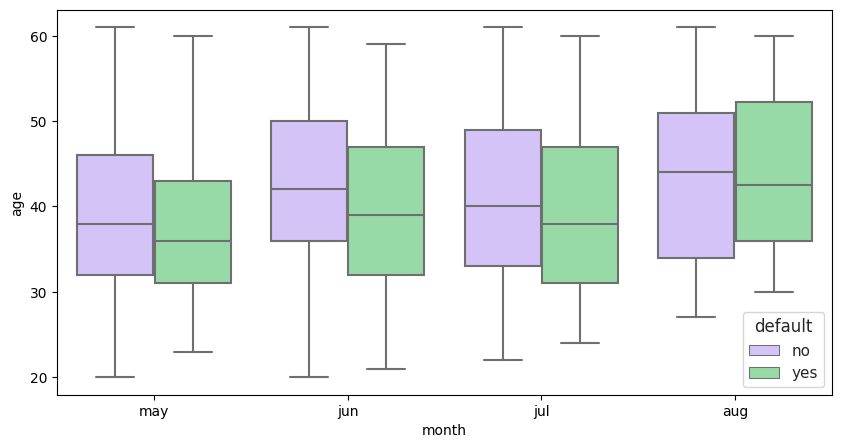

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5), dpi = 100)

sns.set_theme(style = "ticks", palette = "pastel")
sns.boxplot(x = "month", y = "age",
            hue = "default", palette=["m", "g"],
            data = dados_pd)

# Window

In [64]:
simpleData = (("James", "Sales", 3000),
    ("Michael", "Sales", 4600),
    ("Robert", "Sales", 4100),
    ("Maria", "Finance", 3000),
    ("James", "Sales", 3000),
    ("Scott", "Finance", 3300),
    ("Jen", "Finance", 3900),
    ("Jeff", "Marketing", 3000),
    ("Kumar", "Marketing", 2000),
    ("Saif", "Sales", 4100)
  )

columns= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = simpleData, schema = columns)
df.show()

+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|        James|     Sales|  3000|
|      Michael|     Sales|  4600|
|       Robert|     Sales|  4100|
|        Maria|   Finance|  3000|
|        James|     Sales|  3000|
|        Scott|   Finance|  3300|
|          Jen|   Finance|  3900|
|         Jeff| Marketing|  3000|
|        Kumar| Marketing|  2000|
|         Saif|     Sales|  4100|
+-------------+----------+------+



In [65]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

In [66]:
w1  = Window.partitionBy("department").orderBy("salary")

df = df.withColumn("row_number", row_number().over(w1))
df.show()

+-------------+----------+------+----------+
|employee_name|department|salary|row_number|
+-------------+----------+------+----------+
|        James|     Sales|  3000|         1|
|        James|     Sales|  3000|         2|
|       Robert|     Sales|  4100|         3|
|         Saif|     Sales|  4100|         4|
|      Michael|     Sales|  4600|         5|
|        Maria|   Finance|  3000|         1|
|        Scott|   Finance|  3300|         2|
|          Jen|   Finance|  3900|         3|
|        Kumar| Marketing|  2000|         1|
|         Jeff| Marketing|  3000|         2|
+-------------+----------+------+----------+



In [67]:
w2  = Window.partitionBy("department")

df = df.withColumn("max_salary", f.max(f.col("salary")).over(w2))
df.show()

+-------------+----------+------+----------+----------+
|employee_name|department|salary|row_number|max_salary|
+-------------+----------+------+----------+----------+
|        James|     Sales|  3000|         1|      4600|
|        James|     Sales|  3000|         2|      4600|
|       Robert|     Sales|  4100|         3|      4600|
|         Saif|     Sales|  4100|         4|      4600|
|      Michael|     Sales|  4600|         5|      4600|
|        Maria|   Finance|  3000|         1|      3900|
|        Scott|   Finance|  3300|         2|      3900|
|          Jen|   Finance|  3900|         3|      3900|
|        Kumar| Marketing|  2000|         1|      3000|
|         Jeff| Marketing|  3000|         2|      3000|
+-------------+----------+------+----------+----------+



In [68]:
df = (df.withColumn("dif_salary", f.col("salary") - f.col("max_salary"))
        .withColumn("pct_max_salary", f.round(f.col("salary")/f.col("max_salary"),2))
)
df.show()

+-------------+----------+------+----------+----------+----------+--------------+
|employee_name|department|salary|row_number|max_salary|dif_salary|pct_max_salary|
+-------------+----------+------+----------+----------+----------+--------------+
|        James|     Sales|  3000|         1|      4600|     -1600|          0.65|
|        James|     Sales|  3000|         2|      4600|     -1600|          0.65|
|       Robert|     Sales|  4100|         3|      4600|      -500|          0.89|
|         Saif|     Sales|  4100|         4|      4600|      -500|          0.89|
|      Michael|     Sales|  4600|         5|      4600|         0|           1.0|
|        Maria|   Finance|  3000|         1|      3900|      -900|          0.77|
|        Scott|   Finance|  3300|         2|      3900|      -600|          0.85|
|          Jen|   Finance|  3900|         3|      3900|         0|           1.0|
|        Kumar| Marketing|  2000|         1|      3000|     -1000|          0.67|
|         Jeff| 